In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

## Part 1: Loading the Dataset; Preliminary Analysis
load the data into a DataFrame, and will explore the structure of the data set

In [2]:
fc = pd.read_csv('forest_cover.txt', delimiter='\t')
fc.head(5)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area,Soil_Type,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,Rawah,29,5
1,2590,56,2,212,-6,390,220,235,151,6225,Rawah,29,5
2,2804,139,9,268,65,3180,234,238,135,6121,Rawah,12,2
3,2785,155,18,242,118,3090,238,238,122,6211,Rawah,30,2
4,2595,45,2,153,-1,391,220,234,150,6172,Rawah,29,5


we will examine the dimensions of the dataset to understand the number of observations and features it contains. The number of rows in the dataset represents the observations, while the number of columns represents the features.

In [3]:
print("Shape of the fc DataFrame:", fc.shape)

Shape of the fc DataFrame: (15120, 13)


We will analyze the distribution of cover types to establish a baseline expectation. If we were to make random guesses for the cover type, we would expect to be correct 1/7 of the time, resulting in an accuracy of 0.1429. This baseline accuracy will serve as an important benchmark for evaluating the performance of our machine learning models

In [4]:
cover_type_distribution = fc['Cover_Type'].value_counts().sort_index()
cover_type_distribution

1    2160
2    2160
3    2160
4    2160
5    2160
6    2160
7    2160
Name: Cover_Type, dtype: int64

reate a list of seven colors to be used as a palette in plots that you

In [5]:
palette = ['orchid', 'lightcoral', 'orange', 'gold', 'lightgreen', 'deepskyblue', 'cornflowerblue']

## Part 2: Distribution of Cover Type by Wilderness Area
 we will start by determining the
distribution of the wilderness areas within our dataset

In [6]:
wilderness_area_distribution = fc['Wilderness_Area'].value_counts().sort_index()
wilderness_area_distribution

Cache la Poudre    4675
Comanche Peak      6349
Neota               499
Rawah              3597
Name: Wilderness_Area, dtype: int64

we will create a DataFrame to determine the how many regions of each cover type are
in each of the four wilderness areas

In [7]:
ct_by_wa = pd.crosstab(fc['Cover_Type'], fc['Wilderness_Area'])
ct_by_wa

Wilderness_Area,Cache la Poudre,Comanche Peak,Neota,Rawah
Cover_Type,,,,
1,0,917,181,1062
2,20,940,66,1134
3,1297,863,0,0
4,2160,0,0,0
5,0,1304,0,856
6,1198,962,0,0
7,0,1363,252,545


you will visually represent the information in the DataFrame we just created in the
form of a stacked bar chart

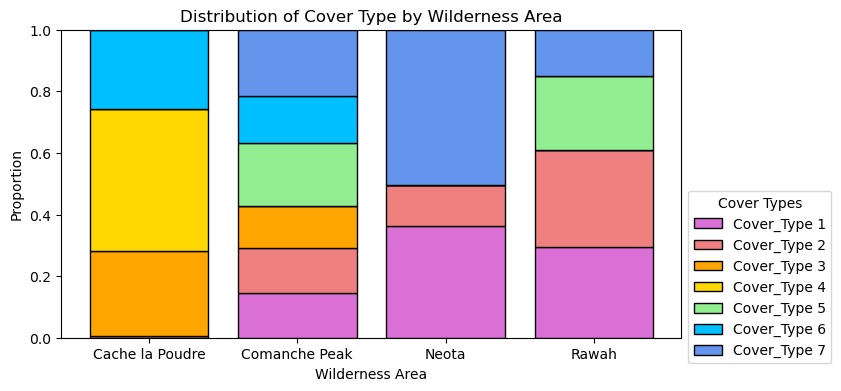

In [8]:
ct_by_wa_props = ct_by_wa / ct_by_wa.sum()
bb = np.cumsum(ct_by_wa_props) - ct_by_wa_props
fig = plt.figure(figsize=(8, 4))
for i, row in enumerate(ct_by_wa_props.iterrows()):
    row_data = row[1]
    plt.bar(x=ct_by_wa.columns, height=row_data, bottom=bb.iloc[i], color=palette[i], edgecolor='black', label=f'Cover_Type {i+1}')
plt.xlabel('Wilderness Area')
plt.ylabel('Proportion')
plt.title('Distribution of Cover Type by Wilderness Area')
plt.legend(bbox_to_anchor=(1,0.5), title='Cover Types')
plt.show()

## Part 3: Distribution of Cover Type by Soil Type
we will start by creating a DataFrame to
determine the number of regions of each cover type there are for each of the 40 soil types

In [9]:
ct_by_st = pd.crosstab(fc['Cover_Type'], fc['Soil_Type'])
ct_by_st

Soil_Type,1,2,3,4,5,6,8,9,10,11,...,31,32,33,34,35,36,37,38,39,40
Cover_Type,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,5,0,0,0,1,9,5,...,114,230,184,0,3,0,0,80,79,49
2,0,3,12,20,0,7,1,9,81,67,...,97,255,184,12,1,2,0,7,3,3
3,121,283,133,462,55,248,0,0,717,89,...,0,5,0,0,0,0,0,0,0,0
4,139,94,799,133,39,244,0,0,170,24,...,0,0,0,0,0,0,0,0,0,0
5,0,61,0,129,0,0,0,0,64,154,...,87,100,115,4,0,0,0,0,0,0
6,95,182,18,87,71,151,0,0,1101,67,...,7,30,66,2,0,0,0,0,0,0
7,0,0,0,7,0,0,0,0,0,0,...,27,70,67,4,98,8,34,641,575,407


we will visually represent the information in the DataFrame we just created in the
form of a stacked bar chart.

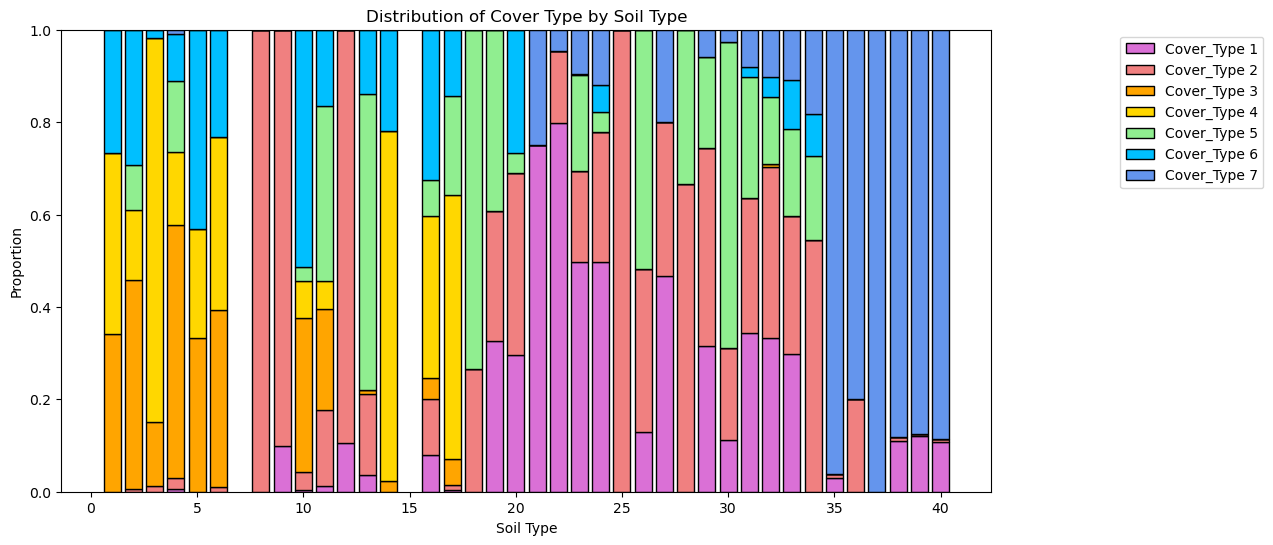

In [10]:
ct_by_st_props = ct_by_st.div(ct_by_st.sum())
bb = np.cumsum(ct_by_st_props) - ct_by_st_props
fig = plt.figure(figsize=[12, 6])
for i, row in ct_by_st_props.iterrows():
    plt.bar(
        ct_by_st_props.columns,  
        row,                   
        bottom=bb.loc[i],      
        edgecolor='black',     
        color=palette[i - 1],   
        label=f'Cover_Type {i}'  
    )
plt.xlabel("Soil Type")
plt.ylabel("Proportion")
plt.title("Distribution of Cover Type by Soil Type")
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.show()

## Part 4: Distribution of Elevation by Cover Type
we will start by calculating the average
elevation for each of the seven cover types

In [11]:
elevation_mean_by_cover_type = fc[['Elevation', 'Cover_Type']].groupby('Cover_Type').mean()
elevation_mean_by_cover_type

,Elevation
Cover_Type,
1,3128.025926
2,2922.540278
3,2398.423148
4,2223.420370
5,2786.801389
6,2423.276852
7,3362.769907


we will create histograms to visually explore the distribution of elevations for each of
the seven cover types

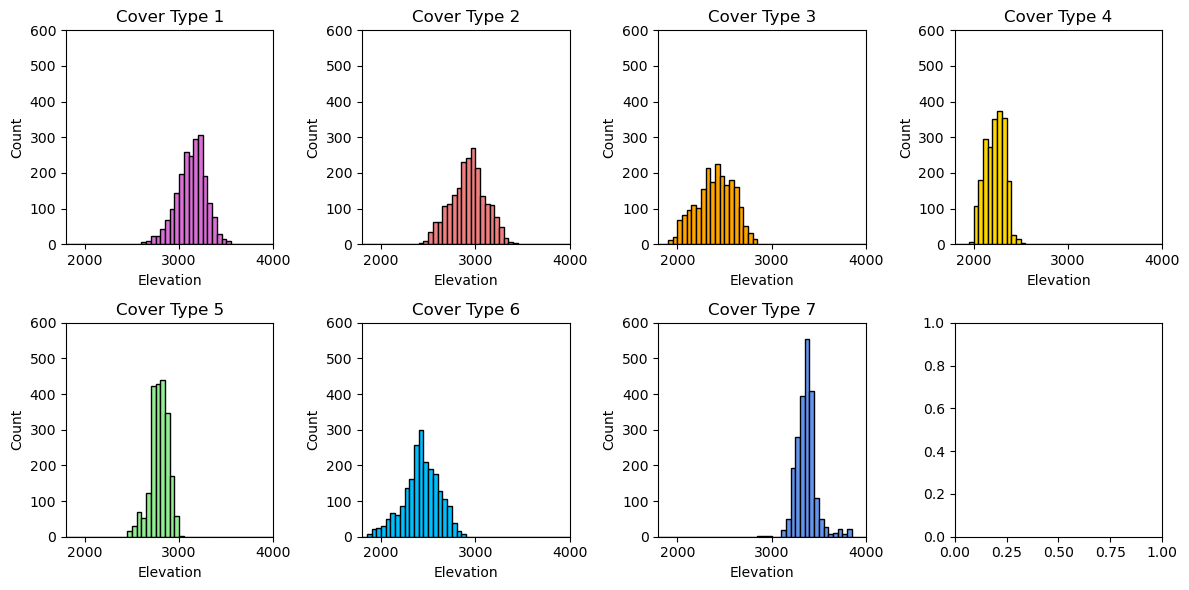

In [12]:
fig, axes = plt.subplots(2, 4, figsize=[12, 6])
for cover_type, ax in zip(range(1, 8), axes.flatten()):
    elevation_data = fc[fc['Cover_Type'] == cover_type]['Elevation']
    ax.hist(
        elevation_data,
        bins=np.arange(1800, 4050, 50),
        color=palette[cover_type - 1], 
        edgecolor='black', 
    )
    
    ax.set_title(f'Cover Type {cover_type}')
    ax.set_xlim([1800, 4000])
    ax.set_ylim([0, 600])
    ax.set_xlabel("Elevation")
    ax.set_ylabel("Count")
plt.tight_layout()
plt.show()

## Part 5: Creating Training, Validation, and Test Sets
we will start by separating the
categorical features, the numerical features, and the labels

In [13]:
X_num = fc.select_dtypes(include=['number']).values
X_cat = fc.select_dtypes(include=['object']).values
y = fc['Cover_Type'].values
print("Numerical Feature Array Shape:   ", X_num.shape)
print("Categorical Feature Array Shape: ", X_cat.shape)
print("Label Array Shape:               ", y.shape)

Numerical Feature Array Shape:    (15120, 12)
Categorical Feature Array Shape:  (15120, 1)
Label Array Shape:                (15120,)


we will now be encoding the categorical variables using one-hot encoding

In [14]:
encoder = OneHotEncoder(sparse=False)
encoder.fit(X_cat)
X_enc = encoder.transform(X_cat)
print("Encoded Feature Array Shape:", X_enc.shape)

Encoded Feature Array Shape: (15120, 4)


D:\aldul\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


we will now combine the numerical features with the encoded features

In [15]:
X = np.hstack((X_num, X_enc))
print("Feature Array Shape:", X.shape)

Feature Array Shape: (15120, 16)


we will now split the data into training, validation, and test sets, using a 70/15/15
split

In [16]:
X_train, X_hold, y_train, y_hold = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
X_valid, X_test, y_valid, y_test = train_test_split(X_hold, y_hold, test_size=0.5, random_state=1, stratify=y_hold)
print("Training Features Shape:   ", X_train.shape)
print("Validation Features Shape: ", X_valid.shape)
print("Test Features Shape:       ", X_test.shape)

Training Features Shape:    (10584, 16)
Validation Features Shape:  (2268, 16)
Test Features Shape:        (2268, 16)


## Part 6: Logistic Regression Model
we will create and evaluate a logistic regression model

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr_mod = LogisticRegression(solver='lbfgs', max_iter=1000, multi_class='multinomial', penalty='none')
lr_mod.fit(X_train, y_train)
y_train_pred = lr_mod.predict(X_train)
y_valid_pred = lr_mod.predict(X_valid)
training_accuracy = accuracy_score(y_train, y_train_pred)
validation_accuracy = accuracy_score(y_valid, y_valid_pred)
print("Training Accuracy:   ", round(training_accuracy, 4))
print("Validation Accuracy: ", round(validation_accuracy, 4))

D:\aldul\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


Training Accuracy:    0.701
Validation Accuracy:  0.6997


D:\aldul\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Part 7: Decision Tree Models
we will create and evaluate several decision tree models

In [18]:
dt_train_acc = []
dt_valid_acc = []
depth_range = range(2, 31)
for depth in depth_range:
    np.random.seed(1)
    temp_tree = DecisionTreeClassifier(max_depth=depth)
    temp_tree.fit(X_train, y_train)
    train_acc = accuracy_score(y_train, temp_tree.predict(X_train))
    valid_acc = accuracy_score(y_valid, temp_tree.predict(X_valid))
    dt_train_acc.append(train_acc)
    dt_valid_acc.append(valid_acc)
dt_idx = np.argmax(dt_valid_acc)
dt_opt_depth = depth_range[dt_idx]
optimal_train_acc = dt_train_acc[dt_idx]
optimal_valid_acc = dt_valid_acc[dt_idx]
print("Optimal value for max_depth:           ", dt_opt_depth)
print("Training Accuracy for Optimal Model:   ", round(optimal_train_acc, 4))
print("Validation Accuracy for Optimal Model: ", round(optimal_valid_acc, 4))

Optimal value for max_depth:            5
Training Accuracy for Optimal Model:    1.0
Validation Accuracy for Optimal Model:  1.0


we will plot the training and validation curves as a function of max_depth

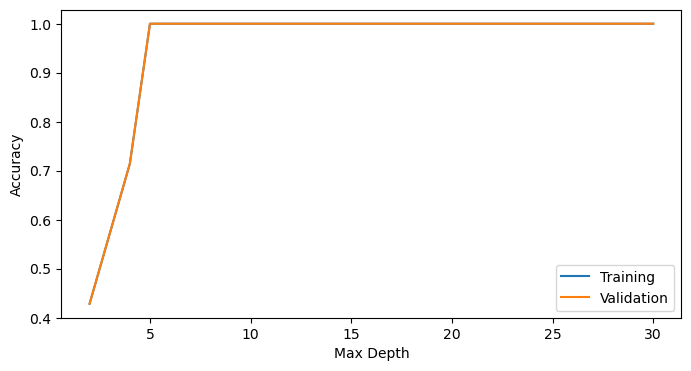

In [19]:
plt.figure(figsize=(8, 4))
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.plot(depth_range, dt_train_acc, label="Training")
plt.plot(depth_range, dt_valid_acc, label="Validation")
plt.legend()
plt.show()

## Part 8: Random Forest Models
we will create and evaluate several random forest models

In [20]:
rf_train_acc = []
rf_valid_acc = []
for depth in depth_range:
    np.random.seed(1)
    temp_forest = RandomForestClassifier(max_depth=depth, n_estimators=100, random_state=1)
    temp_forest.fit(X_train, y_train)
    train_acc = accuracy_score(y_train, temp_forest.predict(X_train))
    valid_acc = accuracy_score(y_valid, temp_forest.predict(X_valid))
    rf_train_acc.append(train_acc)
    rf_valid_acc.append(valid_acc)
rf_idx = np.argmax(rf_valid_acc)
rf_opt_depth = depth_range[rf_idx]
optimal_train_acc = rf_train_acc[rf_idx]
optimal_valid_acc = rf_valid_acc[rf_idx]
print("Optimal value for max_depth:           ", rf_opt_depth)
print("Training Accuracy for Optimal Model:   ", round(optimal_train_acc, 4))
print("Validation Accuracy for Optimal Model: ", round(optimal_valid_acc, 4))

Optimal value for max_depth:            10
Training Accuracy for Optimal Model:    1.0
Validation Accuracy for Optimal Model:  0.9996


we will plot the training and validation curves as a function of max_depth

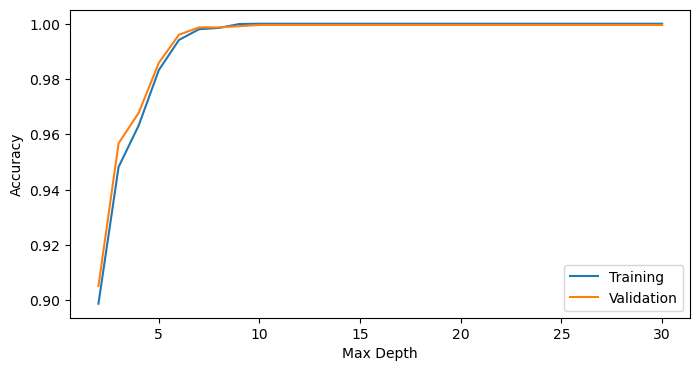

In [21]:
plt.figure(figsize=(8, 4))
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.plot(depth_range, rf_train_acc, label="Training")
plt.plot(depth_range, rf_valid_acc, label="Validation")
plt.legend()
plt.show()

## Part 9: Create and Evaluate Final Model
we will select our final model, and will evaluate it on the test set.

In [22]:
np.random.seed(1)
final_model = DecisionTreeClassifier(max_depth=dt_opt_depth)
final_model.fit(X_train, y_train)
y_train_pred = final_model.predict(X_train)
y_valid_pred = final_model.predict(X_valid)
y_test_pred = final_model.predict(X_test)
training_accuracy = accuracy_score(y_train, y_train_pred)
validation_accuracy = accuracy_score(y_valid, y_valid_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Training Accuracy for Final Model:   ", round(training_accuracy, 4))
print("Validation Accuracy for Final Model: ", round(validation_accuracy, 4))
print("Testing Accuracy for Final Model:    ", round(test_accuracy, 4))


Training Accuracy for Final Model:    1.0
Validation Accuracy for Final Model:  1.0
Testing Accuracy for Final Model:     1.0


we will now create and display a confusion matrix detailing the model's
performance on the test set

In [23]:
test_pred = final_model.predict(X_test)
conf_matrix = confusion_matrix(y_test, test_pred)
labels = range(1, 8)
conf_matrix_df = pd.DataFrame(conf_matrix, index=labels, columns=labels)
conf_matrix_df

,1,2,3,4,5,6,7
1,324,0,0,0,0,0,0
2,0,324,0,0,0,0,0
3,0,0,324,0,0,0,0
4,0,0,0,324,0,0,0
5,0,0,0,0,324,0,0
6,0,0,0,0,0,324,0
7,0,0,0,0,0,0,324


we will now generate a classification report to provide further insight into the
model's performance on the test set

In [24]:
report = classification_report(y_test, test_pred)
print(report)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       324
           2       1.00      1.00      1.00       324
           3       1.00      1.00      1.00       324
           4       1.00      1.00      1.00       324
           5       1.00      1.00      1.00       324
           6       1.00      1.00      1.00       324
           7       1.00      1.00      1.00       324

    accuracy                           1.00      2268
   macro avg       1.00      1.00      1.00      2268
weighted avg       1.00      1.00      1.00      2268

